# Optimisation Results Plots

Code used for the generation of images related to the results obtained from the Bayesian Experimental Design for model selection. These are figures 4 and 3 respectively. 

### Load Required Libraries

In [2]:
from sys import argv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns
from numba import jit
import gaussianprocess as gp
from fitderiv import fitderiv
import genutils as gu
import datetime
from bayes_opt import BayesianOptimization
from bayes_opt.observer import JSONLogger
from bayes_opt.event import Events
from bayes_opt.util import load_logs
import pickle
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import math
sns.set(style="ticks")

### Load objective function values data

In [3]:
# --> Utility Function values at each iteration for all the combinations

CFV1 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_2S_Average.csv', delimiter=",")
CFV2 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_2S_Multiplicative.csv', delimiter=",")
CFV3 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_2S_RFP.csv', delimiter=",")
CFV4 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_2S_GFP.csv', delimiter=",")
CFV5 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_4S_Average.csv', delimiter=",")
CFV6 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_4S_Multiplicative.csv', delimiter=",")
CFV7 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_4S_RFP.csv', delimiter=",")
CFV8 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_4S_GFP.csv', delimiter=",")
CFV9 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_6S_Average.csv', delimiter=",")
CFV10 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_6S_Multiplicative.csv', delimiter=",")
CFV11 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_6S_RFP.csv', delimiter=",")
CFV12 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_6S_GFP.csv', delimiter=",")
CFV13 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_8S_Average.csv', delimiter=",")
CFV14 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_8S_Multiplicative.csv', delimiter=",")
CFV15 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_8S_RFP.csv', delimiter=",")
CFV16 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/CFV_Iter_8S_GFP.csv', delimiter=",")

# --> Combine results in a dataframe

x = ['$2$']*804*4+['$4$']*804*4+['$6$']*804*4+['$8$']*804*4
y = (['Average']*804+['Multiplicative']*804+['RFP']*804+['GFP']*804)*4

d1 = (np.concatenate(np.array([CFV1['CFV'].values[0:804], np.sqrt(CFV2['CFV'].values[0:804]), 
                               CFV3['CFV'].values[0:804], CFV4['CFV'].values[0:804], 
                               CFV5['CFV'].values[0:804], np.sqrt(CFV6['CFV'].values[0:804]), 
                               CFV7['CFV'].values[0:804], CFV8['CFV'].values[0:804], 
                               CFV9['CFV'].values[0:804], np.sqrt(CFV10['CFV'].values[0:804]), 
                               CFV11['CFV'].values[0:804], CFV12['CFV'].values[0:804], 
                               CFV13['CFV'].values[0:804], np.sqrt(CFV14['CFV'].values[0:804]), 
                               CFV15['CFV'].values[0:804], CFV16['CFV'].values[0:804]])))

dat = pd.DataFrame(np.matrix.transpose(np.array([np.asarray(d1), np.asarray(x), np.asarray(y)])), columns = ['CFV','Steps','Comb'])

for col in ['Steps', 'Comb']:
    dat[col] = dat[col].astype('category')
for col in ['CFV']:
    dat[col] = dat[col].astype('float64')


In [4]:
# --> Best utility function values for the best case (2 steps optimisation)

bestCFV1 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/bestCFV_Iter_2S_Average.csv', delimiter=",")
bestCFV2 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/bestCFV_Iter_2S_Multiplicative.csv', delimiter=",")
bestCFV3 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/bestCFV_Iter_2S_RFP.csv', delimiter=",")
bestCFV4 = pd.read_csv('C:/eigg.sms.ed.ac.uk/BayesianOptimisation/BEDms/CFVs/bestCFV_Iter_2S_GFP.csv', delimiter=",")

### Plot boxplots with Objective Funtion Values and Best Objective Function Values so far per iteration

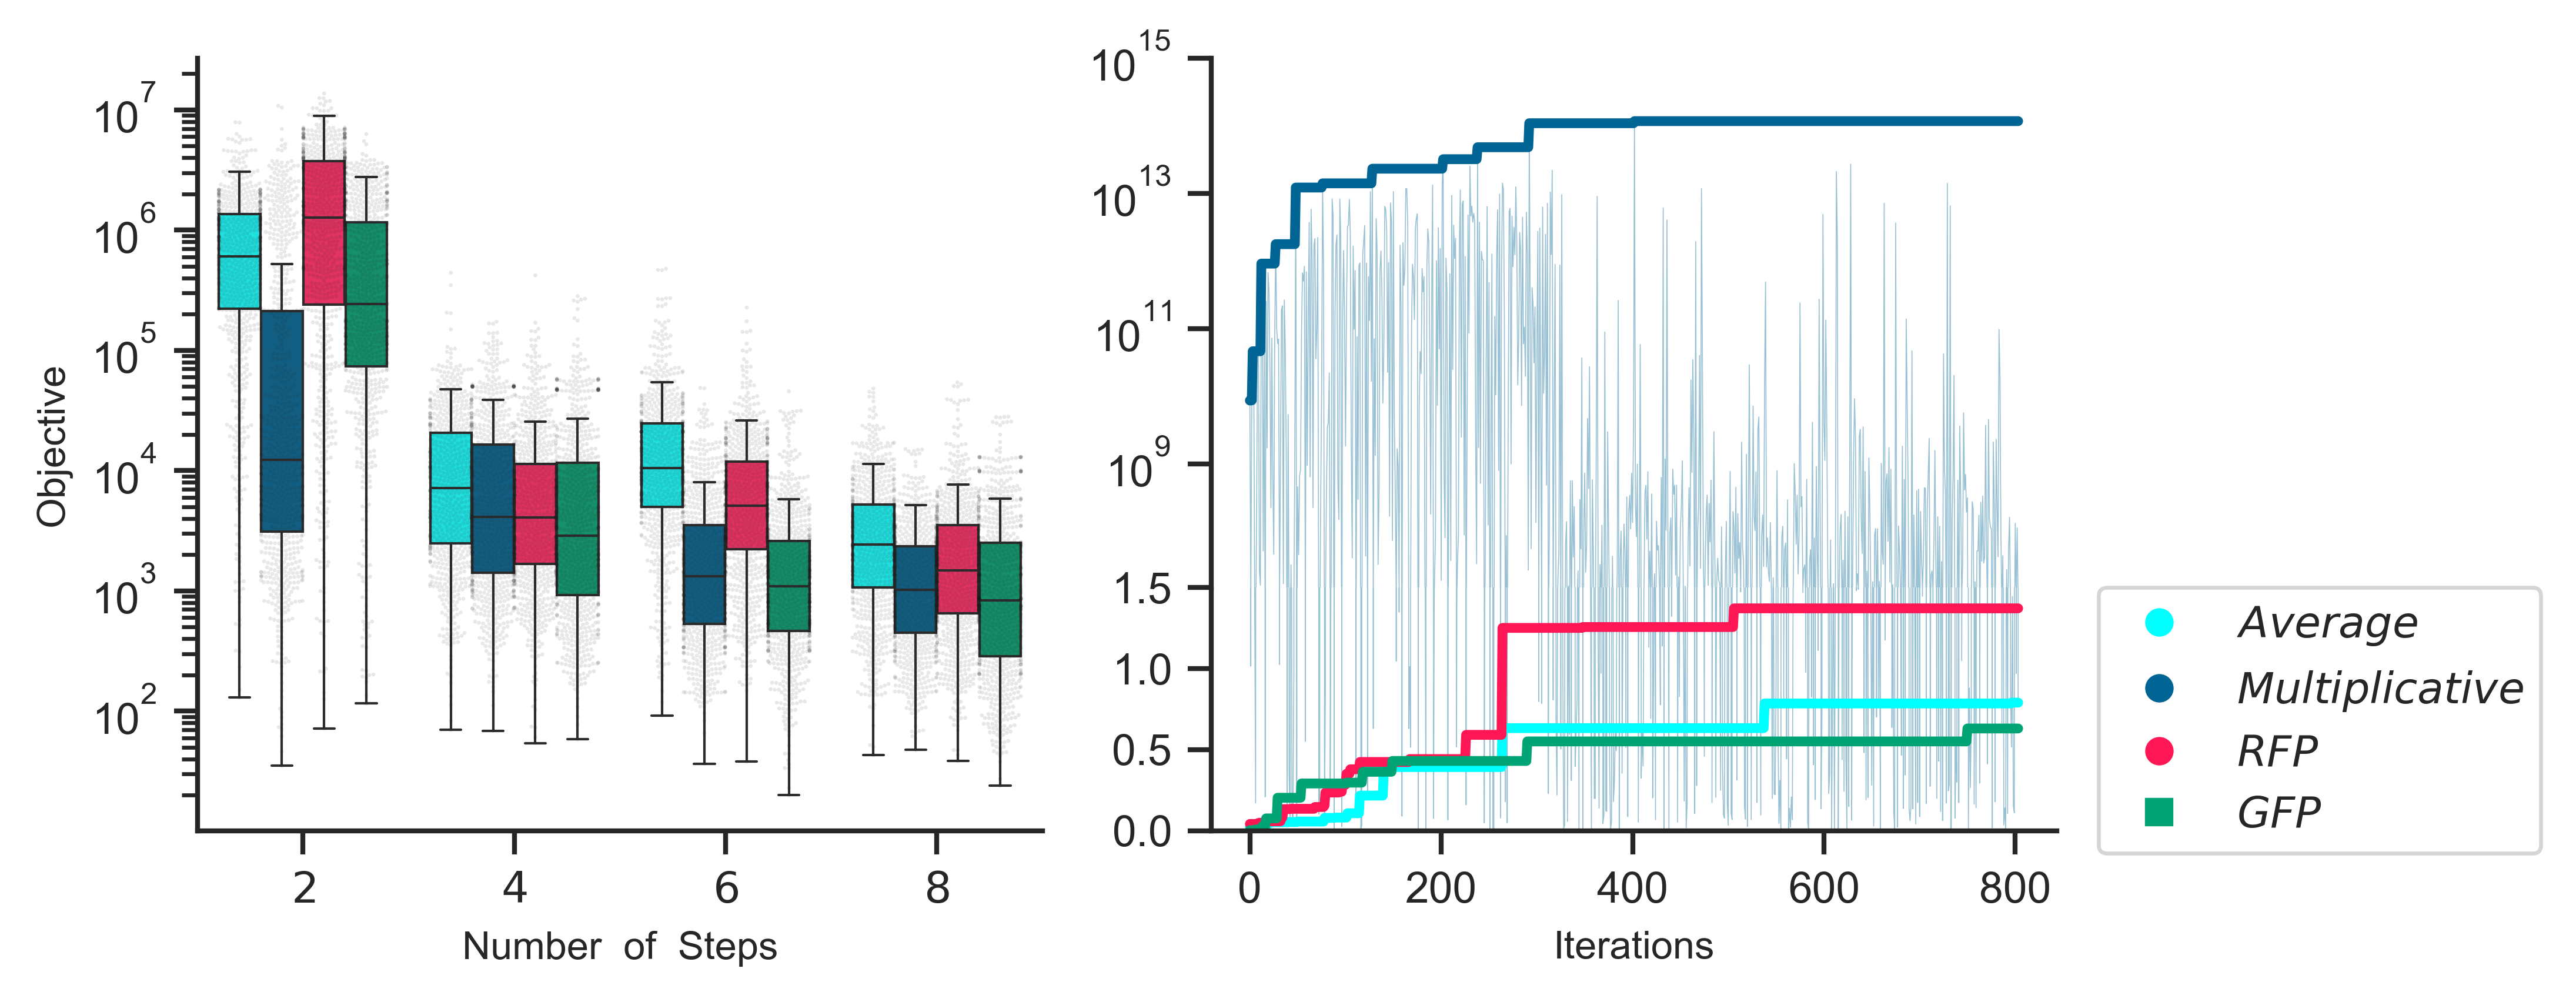

In [9]:
fig = plt.figure(figsize=(6.8, 2.9), dpi = 600)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8,"axes.tickslabelssize":8,"text.usetex" : True,"text.latex.unicode" : True})  
pal = dict(Average='#00FFFF', Multiplicative = '#006494',RFP = '#FF1654', GFP = '#00A474')

gs = gridspec.GridSpec(1, 2)

#------> BoxPlot Average
ax1 = plt.subplot(gs[0, 0])
ax1.set_yscale('log')

ax1 = sns.swarmplot(x = 'Steps', y = 'CFV', hue = 'Comb', data = dat,
                    size=0.8, color="k", linewidth=0, alpha = .1, dodge = True, hue_order = ["Average", "Multiplicative", "RFP", "GFP"])
ax1 = sns.boxplot(x = 'Steps', y = 'CFV', hue = 'Comb', data = dat,
                  fliersize = 0,linewidth=0.5,palette = pal, hue_order = ["Average", "Multiplicative", "RFP", "GFP"])

ax1.get_legend().remove()
ax1.set_xlabel('Number  of  Steps')
ax1.set_ylabel('Objective');
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)


#------> Accuracy Plot
ax2 = plt.subplot(gs[0, 1])

ax2.plot(CFV2['CFV'][0:804], label = "", color='#006494', linewidth=0.2, alpha=0.4)

ax2.plot(bestCFV1['CFV'][0:804],label = '', color='#00FFFF', linewidth=2)
ax2.plot([], 'o', label = '$Average$', color='#00FFFF', linewidth=2)

ax2.plot(bestCFV2['CFV'][0:804], label = '', color='#006494', linewidth=2)
ax2.plot([], 'o', label = '$Multiplicative$', color='#006494', linewidth=2)

ax2.plot(bestCFV3['CFV'][0:804], label = '', color='#FF1654', linewidth=2)
ax2.plot([], 'o', label = '$RFP$', color='#FF1654', linewidth=2)

ax2.plot(bestCFV4['CFV'][0:804], label = '', color='#00A474', linewidth=2)
ax2.plot([], 's', label = '$GFP$', color='#00A474', linewidth=2)

ax2.set_yscale('linear')
ax2.set_ylim((1, 1.5e7))
ax2.ticklabel_format(style='sci', axis='y', useMathText=True)

divider = make_axes_locatable(ax2)
axLin = divider.append_axes("top", size=1.5, pad=0, sharex=ax2)
axLin.set_yscale('log')
axLin.set_ylim((1.5e7, 1e15))
axLin.plot(bestCFV2['CFV'][0:804], label = '$Multiplicative$', color='#006494', linewidth=2)
axLin.plot(CFV2['CFV'][0:804], color='#006494', linewidth=0.2, alpha=0.4)
axLin.spines['bottom'].set_visible(False)
axLin.xaxis.set_visible(False)
plt.setp(axLin.get_xticklabels(), visible=False)


ax2.set_xlabel('Iterations')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
axLin.spines['right'].set_visible(False)
axLin.spines['top'].set_visible(False)
ax2.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)


plt.savefig('C:/eigg.sms.ed.ac.uk/ObjectiveOptim2.svg')
plt.show()

### Schematic of the best optimisation result

In [10]:
# ---> Results of the best optimisation

Exp_Data_NoOpt_In= pd.read_csv('D:/RSTAN/Optim2Steps_Inputs.csv', delimiter=",")

Pred_NoOpt_GFP= pd.read_csv('D:/RSTAN/Model4_ODEs_ConfInter_ParamsMulti_ExperOptim2Steps_GFP.csv', delimiter=",")
Pred_NoOpt_RFP= pd.read_csv('D:/RSTAN/Model4_ODEs_ConfInter_ParamsMulti_ExperOptim2Steps_RFP.csv', delimiter=",")

PredM2_NoOpt_GFP= pd.read_csv('D:/RSTAN/Model2_ODEs_ConfInter_ParamsMulti_ExperOptim2Steps_GFP.csv', delimiter=",")
PredM2_NoOpt_RFP= pd.read_csv('D:/RSTAN/Model2_ODEs_ConfInter_ParamsMulti_ExperOptim2Steps_RFP.csv', delimiter=",")

In [11]:
# ----> Schematic Examples

# Good
SC_Exp_Data_Opt_In= pd.read_csv('D:/RSTAN/Optim6Steps_Inputs.csv', delimiter=",")
SC_Pred_Opt_RFP= pd.read_csv('D:/RSTAN/Model4_ODEs_ConfInter_ParamsMulti_ExperOptim6Steps_RFP.csv', delimiter=",")
SC_PredM2_Opt_RFP= pd.read_csv('D:/RSTAN/Model2_ODEs_ConfInter_ParamsMulti_ExperOptim6Steps_RFP.csv', delimiter=",")

sw = np.linspace(0,1440, 7)

# Bad
SC_Exp_Data_NoOpt_In= pd.read_csv('D:/RSTAN/NoOptim6Steps_Inputs.csv', delimiter=",")
SC_Pred_NoOpt_RFP= pd.read_csv('D:/RSTAN/Model4_ODEs_ConfInter_ParamsMulti_ExperNoOptim6Steps_RFP.csv', delimiter=",")
SC_PredM2_NoOpt_RFP= pd.read_csv('D:/RSTAN/Model2_ODEs_ConfInter_ParamsMulti_ExperNoOptim6Steps_RFP.csv', delimiter=",")

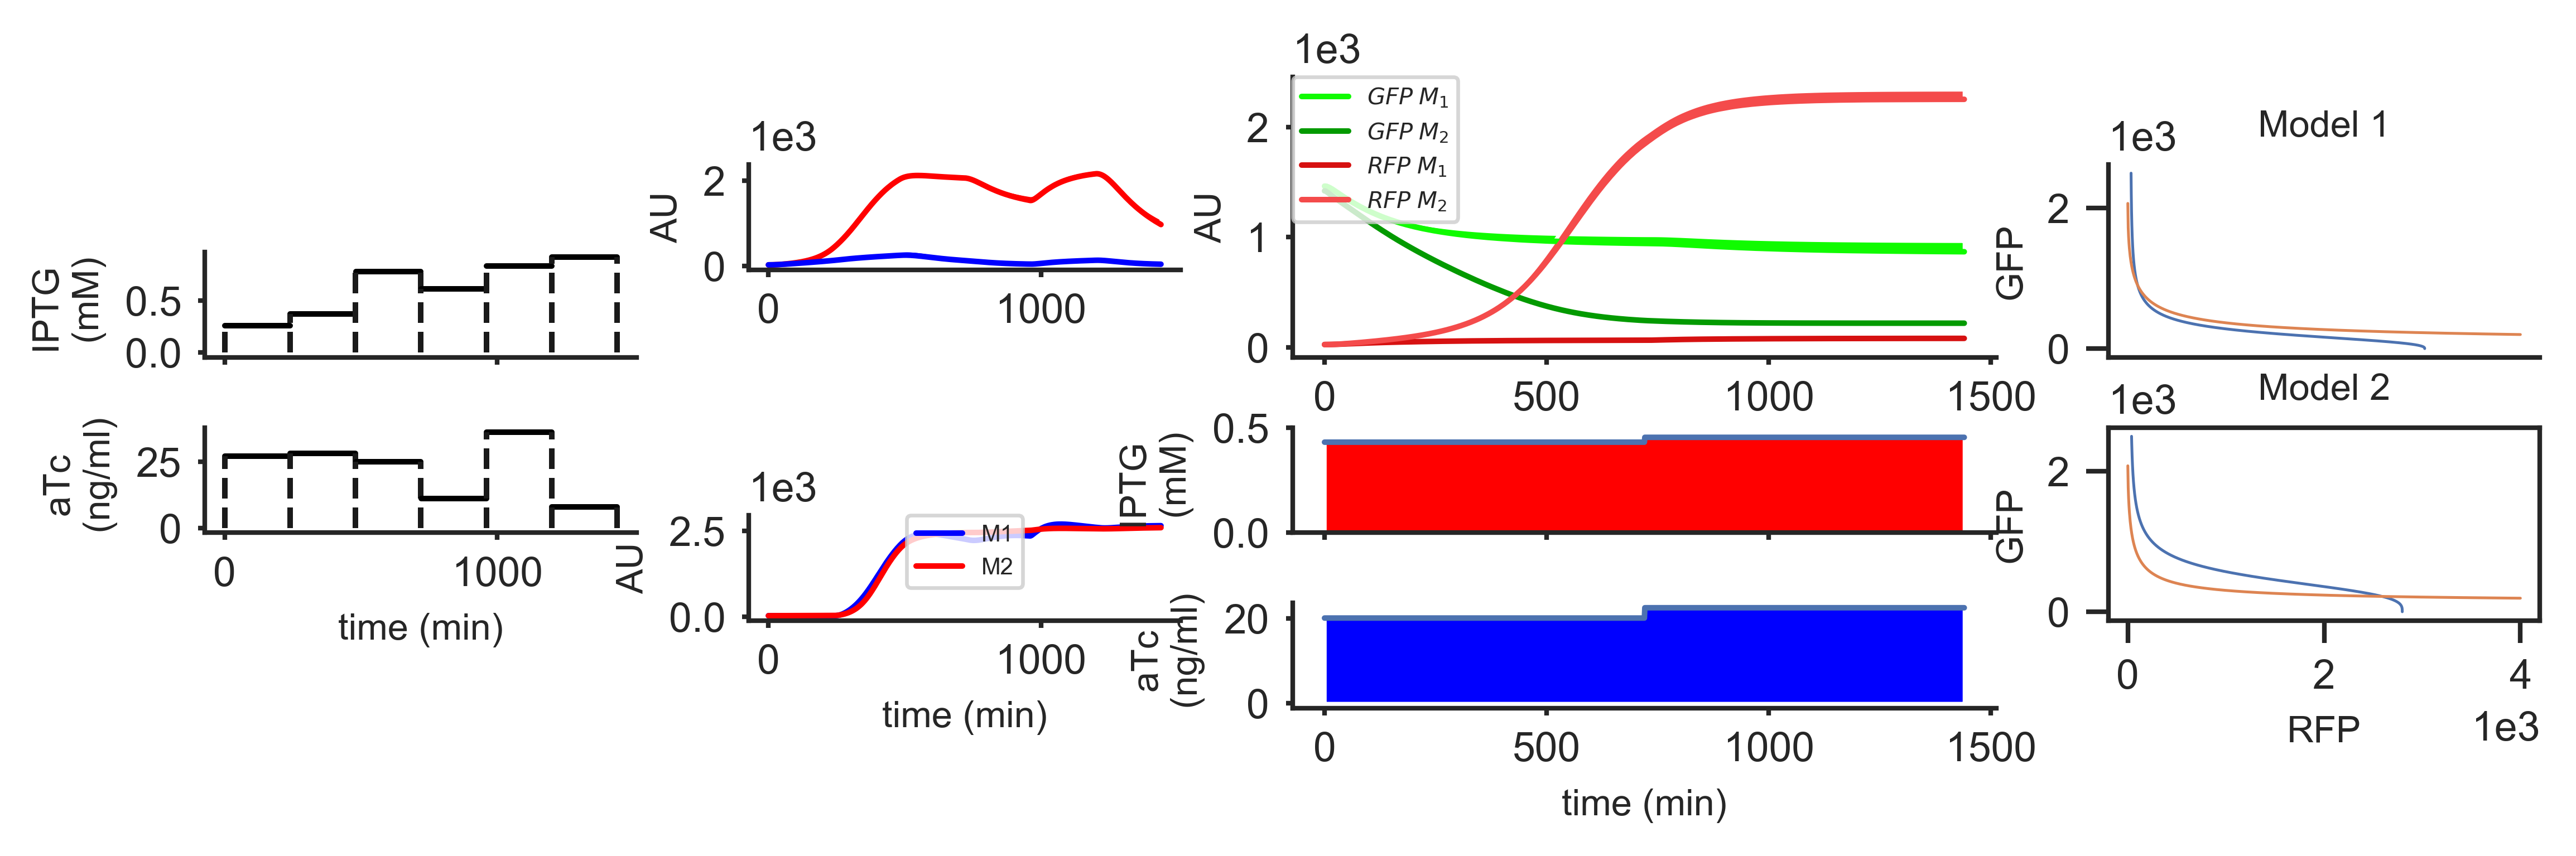

In [12]:

fig = plt.figure(figsize=(9.0, 2.5), dpi = 600)
sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":8,"axes.tickslabelssize":8,"text.usetex" : True,"text.latex.unicode" : True})  


gs = gridspec.GridSpec(8, 9, wspace = 0.7, hspace = 4)

# --------> Input Schematic
ax1 = plt.subplot(gs[2:4, 0:2]) # Exp_Data_Dyn1_In

for i in range(0,6):
    ax1.plot(SC_Exp_Data_Opt_In['time'][int(sw[i])+1:int(sw[i+1])+1], SC_Exp_Data_Opt_In['IPTG'][int(sw[i])+1:int(sw[i+1])+1], color = 'black')
    ax1.plot([SC_Exp_Data_Opt_In['time'][int(sw[i+1])], SC_Exp_Data_Opt_In['time'][int(sw[i+1])]], 
             [0,SC_Exp_Data_Opt_In['IPTG'][int(sw[i+1])]], color='k', linestyle='--')
    ax1.plot([SC_Exp_Data_Opt_In['time'][int(sw[i])], SC_Exp_Data_Opt_In['time'][int(sw[i])]], 
             [0,SC_Exp_Data_Opt_In['IPTG'][int(sw[i])+1]], color='k', linestyle='--')

ax1.set_xticklabels('')
ax1.set_ylabel('IPTG \n (mM)')
ax1.tick_params(length=1.5)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = plt.subplot(gs[4:6, 0:2]) # Exp_Data_Dyn1_In

for i in range(0,6):
    ax2.plot(SC_Exp_Data_Opt_In['time'][int(sw[i])+1:int(sw[i+1])+1], SC_Exp_Data_Opt_In['aTc'][int(sw[i])+1:int(sw[i+1])+1], color = 'black')
    ax2.plot([SC_Exp_Data_Opt_In['time'][int(sw[i+1])], SC_Exp_Data_Opt_In['time'][int(sw[i+1])]], 
             [0,SC_Exp_Data_Opt_In['aTc'][int(sw[i+1])]], color='k', linestyle='--')
    ax2.plot([SC_Exp_Data_Opt_In['time'][int(sw[i])], SC_Exp_Data_Opt_In['time'][int(sw[i])]], 
             [0,SC_Exp_Data_Opt_In['aTc'][int(sw[i])+1]], color='k', linestyle='--')
    
ax2.set_xlabel('time (min)')
ax2.set_ylabel('aTc \n (ng/ml)')
ax2.tick_params(length=1.5)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# -----------> Output Schematic

ax3 = plt.subplot(gs[1:3, 2:4])
ax3.fill_between(np.arange(0, len(SC_Pred_Opt_RFP['2.5CI']),1), SC_Pred_Opt_RFP['2.5CI'], SC_Pred_Opt_RFP['97.5CI'],facecolor='red')
ax3.fill_between(np.arange(0, len(SC_PredM2_Opt_RFP['2.5CI']),1), SC_PredM2_Opt_RFP['2.5CI'], SC_PredM2_Opt_RFP['97.5CI'],facecolor='blue')
ax3.plot(np.arange(0, len(SC_Pred_Opt_RFP['2.5CI']),1), SC_Pred_Opt_RFP['2.5CI'],color='red')
ax3.plot(np.arange(0, len(SC_PredM2_Opt_RFP['2.5CI']),1), SC_PredM2_Opt_RFP['2.5CI'],color='blue')

ax3.tick_params(length=1.5)
ax3.set_ylabel('AU')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)


ax4 = plt.subplot(gs[5:7, 2:4])
ax4.fill_between(np.arange(0, len(SC_Pred_NoOpt_RFP['2.5CI']),1), SC_Pred_NoOpt_RFP['2.5CI'], SC_Pred_NoOpt_RFP['97.5CI'],facecolor='red')
ax4.fill_between(np.arange(0, len(SC_PredM2_NoOpt_RFP['2.5CI']),1), SC_PredM2_NoOpt_RFP['2.5CI'], SC_PredM2_NoOpt_RFP['97.5CI'],facecolor='blue')

ax4.plot(np.arange(0, len(SC_PredM2_NoOpt_RFP['2.5CI']),1), SC_PredM2_NoOpt_RFP['2.5CI'],color='blue', label = 'M1')
ax4.plot(np.arange(0, len(SC_Pred_NoOpt_RFP['2.5CI']),1), SC_Pred_NoOpt_RFP['2.5CI'],color='red', label = 'M2')
ax4.legend(loc='upper center', borderaxespad=0., prop={'size': 5})


ax4.tick_params(length=1.5)
ax4.set_ylabel('AU')
ax4.set_xlabel('time (min)')
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

# ----------> BEST Result

#------> predictions GFP best (dyn1)
ax5 = plt.subplot(gs[0:4, 4:7])
ax5.fill_between(np.arange(0, len(Pred_NoOpt_GFP['2.5CI']),1), Pred_NoOpt_GFP['2.5CI'], Pred_NoOpt_GFP['97.5CI'],facecolor='#039a00')
ax5.fill_between(np.arange(0, len(PredM2_NoOpt_GFP['2.5CI']),1), PredM2_NoOpt_GFP['2.5CI'], PredM2_NoOpt_GFP['97.5CI'],facecolor='#10fb00')

ax5.plot(np.arange(0, len(PredM2_NoOpt_GFP['2.5CI']),1), PredM2_NoOpt_GFP['2.5CI'],color='#10fb00', label = '$GFP \; M_{1}$')
ax5.plot(np.arange(0, len(Pred_NoOpt_GFP['2.5CI']),1), Pred_NoOpt_GFP['2.5CI'],color='#039a00', label = '$GFP \; M_{2}$')

# ax5.plot(len(PredM2_NoOpt_GFP['Median']), PredM2_NoOpt_GFP['Median'][len(PredM2_NoOpt_GFP['Median'])],color='black', marker = 'd')
# ax5.plot(len(Pred_NoOpt_GFP['Median']), Pred_NoOpt_GFP['Median'][len(Pred_NoOpt_GFP['Median'])],color='black', marker = 'p')

ax5.tick_params(length=1.5)
ax5.set_ylabel('AU')
ax5.spines['top'].set_visible(False)
ax5.set_xlabel('')


# #------> predictions RFP best (dyn1)

ax5.fill_between(np.arange(0, len(Pred_NoOpt_RFP['2.5CI']),1), Pred_NoOpt_RFP['2.5CI'], Pred_NoOpt_RFP['97.5CI'],facecolor='#f44b4b')
ax5.fill_between(np.arange(0, len(PredM2_NoOpt_RFP['2.5CI']),1), PredM2_NoOpt_RFP['2.5CI'], PredM2_NoOpt_RFP['97.5CI'],facecolor='#d61111')

ax5.plot(np.arange(0, len(PredM2_NoOpt_RFP['2.5CI']),1), PredM2_NoOpt_RFP['2.5CI'],color='#d61111', label = '$RFP \; M_{1}$')
ax5.plot(np.arange(0, len(Pred_NoOpt_RFP['2.5CI']),1), Pred_NoOpt_RFP['2.5CI'],color='#f44b4b', label = '$RFP \; M_{2}$')

# ax5.plot(len(PredM2_NoOpt_RFP['Median']), PredM2_NoOpt_RFP['Median'][len(PredM2_NoOpt_RFP['Median'])],color='black', marker = 'd', linewidth=0.2)
# ax5.plot(len(Pred_NoOpt_RFP['Median']), Pred_NoOpt_RFP['Median'][len(Pred_NoOpt_RFP['Median'])],color='black', marker = 'p', linewidth=0.2)

ax5.legend(loc=2, borderaxespad=0., prop={'size': 5})
ax5.tick_params(length=1.5)
ax5.spines['right'].set_visible(False)



ax6 = plt.subplot(gs[4:6, 4:7]) # Exp_Data_Dyn1_In
ax6.fill_between(Exp_Data_NoOpt_In['time'], np.zeros(len(Exp_Data_NoOpt_In['time'])), 
                 Exp_Data_NoOpt_In['IPTG'],facecolor='red')
ax6.plot(Exp_Data_NoOpt_In['time'], Exp_Data_NoOpt_In['IPTG'])
# ax2.set_xlabel('time (min)')
ax6.set_xticklabels('')
ax6.set_ylabel('IPTG \n (mM)')
ax6.tick_params(length=1.5)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.set_ylim((0, 0.5))

ax7 = plt.subplot(gs[6:8, 4:7]) # Exp_Data_Dyn1_In
ax7.fill_between(Exp_Data_NoOpt_In['time'], np.zeros(len(Exp_Data_NoOpt_In['time'])), 
                 Exp_Data_NoOpt_In['aTc'],facecolor='blue')
ax7.plot(Exp_Data_NoOpt_In['time'], Exp_Data_NoOpt_In['aTc'])
ax7.set_xlabel('time (min)')
ax7.set_ylabel('aTc \n (ng/ml)')
ax7.tick_params(length=1.5)
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)


# -------------> Nullclines

p = [0.02008691,0.12806548,0.05057985,0.01104457,0.06313878,6.85489158,12.52898487,0.93685841,0.86200568,2.53903192,
     0.09631011,4.63470513,3.38069878,0.03790479,1.11627415,0.58674835]
k_in_IPTG = p[0]
k_out_IPTG = p[1]
k_in_aTc = p[2]
k_out_aTc = p[3]
k_L_pm0 = p[4]
k_L_pm = p[5]
theta_T = p[6]
theta_aTc = p[7]
n_aTc = p[8]
n_T = p[9];
k_T_pm0 = p[10]
k_T_pm = p[11]
theta_L = p[12]
theta_IPTG = p[13]
n_IPTG = p[14]
n_L = p[15]

u_IPTG = 0.47
u_aTc = 23

preGFP = np.linspace(0, 2500, 1000)
preRFP = np.linspace(0, 4000, 1000)

ax8 = plt.subplot(gs[1:4, 7:9])
ax8.plot(((1/0.1386)*(k_L_pm0+(k_L_pm/(1+((preGFP/theta_T)*1/(1+(u_aTc/theta_aTc)**n_aTc))**n_T))))/0.0165, preGFP, linewidth = 0.6)
ax8.plot(preRFP, ((1/0.1386)*(k_T_pm0+(k_T_pm/(1+((preRFP/theta_L)*1/(1+(u_IPTG/theta_IPTG)**n_IPTG))**n_L))))/0.0165, linewidth = 0.6)
ax8.set_title('Model 1')
ax8.set_ylabel('GFP')
ax8.set_xticklabels('')
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)
ax8.xaxis.set_visible(False)


p = [0.44710115,0.01333730,0.05980239,6.33577350,91.21128653,0.90018653,0.44159333,3.26556602,0.27525150,4.48099264,2.68825794,
     0.01698977,0.80554394,0.71353081]
k_IPTG = p[0]
k_aTc = p[1]
k_L_pm0 = p[2]
k_L_pm = p[3]
theta_T = p[4]
theta_aTc = p[5]
n_aTc = p[6]
n_T = p[7];
k_T_pm0 = p[8]
k_T_pm = p[9]
theta_L = p[10]
theta_IPTG = p[11]
n_IPTG = p[12]
n_L = p[13]

ax9 = plt.subplot(gs[4:7, 7:9])
ax9.plot(((1/0.1386)*(k_L_pm0+(k_L_pm/(1+((preGFP/theta_T)*1/(1+(u_aTc/theta_aTc)**n_aTc))**n_T))))/0.0165, preGFP, linewidth = 0.6)
ax9.plot(preRFP, ((1/0.1386)*(k_T_pm0+(k_T_pm/(1+((preRFP/theta_L)*1/(1+(u_IPTG/theta_IPTG)**n_IPTG))**n_L))))/0.0165, linewidth = 0.6)
ax9.set_title('Model 2')
ax9.set_xlabel('RFP')
ax9.set_ylabel('GFP')



ax3.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax4.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax5.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax8.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax9.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# ax8.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax9.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


plt.show()
fig.savefig('C:/eigg.sms.ed.ac.uk/Optimisation.svg')